In [1]:
import os
import pandas as pd
from PIL import Image
import cv2
from pathlib import Path
import glob
from IPython.display import display, Image

In [2]:
%cd yolov5

c:\Users\ARISH\Desktop\2nd_final\yolov5


To detect license plates in the validation dataset and save the results:

In [3]:
!python detect.py --weights runs/train/license_plate_detector/weights/best.pt --source custom_data/test --img 640 --conf 0.30 --save-txt --save-conf --project runs/detect --name license_plate_test

detect: weights=['runs/train/license_plate_detector/weights/best.pt'], source=custom_data/test, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=license_plate_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-366-gf7322921 Python-3.10.14 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/210 C:\Users\ARISH\Desktop\2nd_final\yolov5\custom_data\test\1000.jpg: 448x640 1 license_plate, 74.3ms
image 2/210 C:\Users\ARISH\Desktop\2nd_final\yolov5\custom_data\test\1001.jpg: 640x384 1 license_plate, 67.5ms
image 3/210 C:\Users\ARISH\Desktop\2n

#### 1-selecting the best label based on confidense level from the labels generate by model for test images.
#### 2-Converting the labels Yolo format into (ymin, xmin, ymax, xmax)
#### 3-cropping the detected license plate images and saving them using the bounded box coordinates (ymin, xmin, ymax, xmax)

In [4]:
# Paths
detected_labels_path = Path('runs/detect/license_plate_test/labels')
validation_images_path = Path('custom_data/test')
output_cropped_dir = Path('test_detected_license_plates')
output_cropped_dir.mkdir(parents=True, exist_ok=True)

# List all label files
label_files = list(detected_labels_path.glob('*.txt'))

results = []

for label_file in label_files:
    img_id = label_file.stem
    img_path = validation_images_path / f"{img_id}.jpg"  # Ensure the extension is correct
    img = cv2.imread(str(img_path))

    if img is None:
        print(f"Warning: Unable to read image {img_path}. Skipping.")
        continue  # Skip this iteration if the image could not be read

    # Read detection results from the label file
    with open(label_file, 'r') as file:
        detections = [line.strip().split() for line in file.readlines()]

    if detections:
        # Keep only the most confident detection
        best_detection = max(detections, key=lambda x: float(x[5]))
        class_id, x_center, y_center, width, height, confidence = best_detection

        # Convert YOLO format to (ymin, xmin, ymax, xmax)
        img_height, img_width = img.shape[:2]
        x_center = float(x_center) * img_width
        y_center = float(y_center) * img_height
        width = float(width) * img_width
        height = float(height) * img_height

        xmin = int(x_center - width / 2)
        ymin = int(y_center - height / 2)
        xmax = int(x_center + width / 2)
        ymax = int(y_center + height / 2)

        # Crop and save the license plate
        cropped_img = img[ymin:ymax, xmin:xmax]
        cropped_img_path = output_cropped_dir / f"{img_id}_cropped.jpg"
        cv2.imwrite(str(cropped_img_path), cropped_img)

        # Save result
        results.append([f"{img_id}.jpg", xmin, ymin, xmax, ymax])

# Save results to a CSV file
results_df = pd.DataFrame(results, columns=['img_id', 'xmin', 'ymin', 'xmax', 'ymax'])
results_df.to_csv('test_detected_license_plates.csv', index=False)


Detected license plate from the test images

runs/detect/license_plate_test\1000.jpg


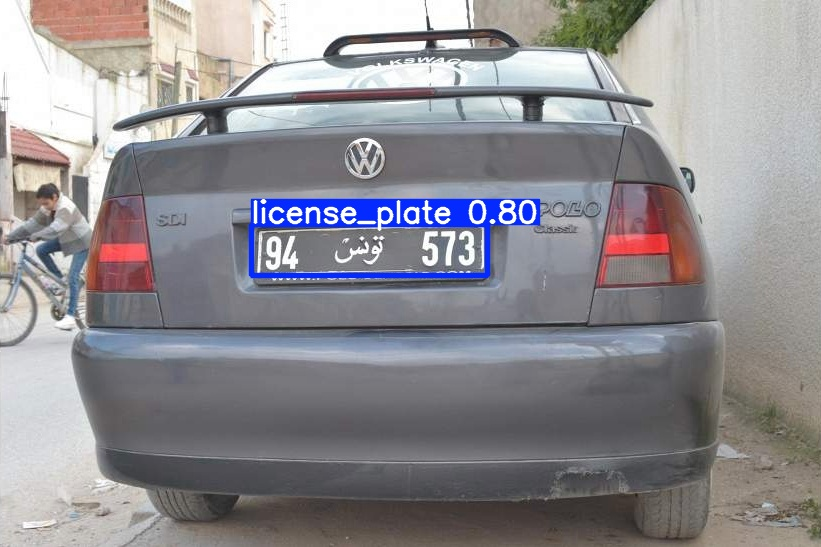



runs/detect/license_plate_test\1001.jpg


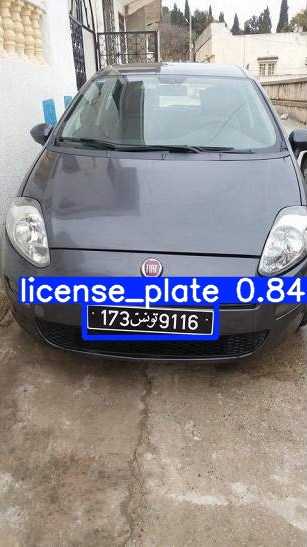



runs/detect/license_plate_test\1002.jpg


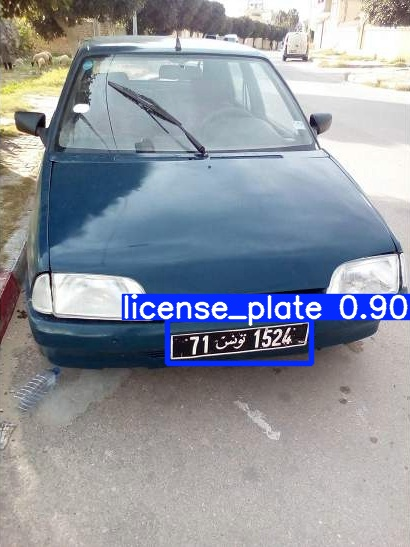



runs/detect/license_plate_test\1003.jpg


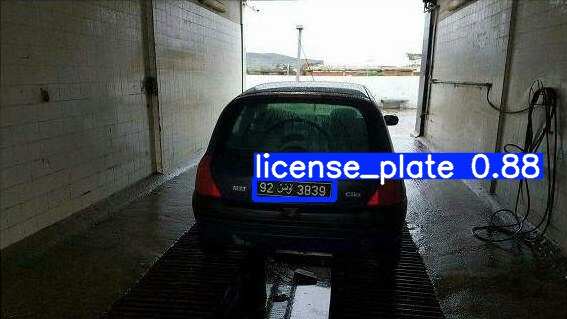



runs/detect/license_plate_test\1004.jpg


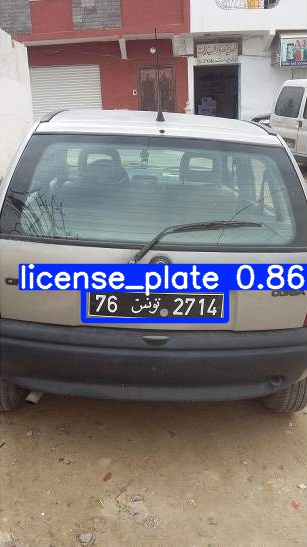

In [5]:
image_list = glob.glob('runs/detect/license_plate_test/*.jpg')  # assuming JPG
for imageName in image_list[:5]:  # display only the first 10 images
    print(imageName)
    display(Image(filename=imageName))
    print("\n")

Cropped detected license plates from the test images

test_detected_license_plates\1000_cropped.jpg


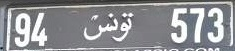



test_detected_license_plates\1001_cropped.jpg


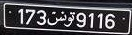



test_detected_license_plates\1002_cropped.jpg


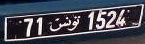



test_detected_license_plates\1003_cropped.jpg




test_detected_license_plates\1004_cropped.jpg




test_detected_license_plates\1005_cropped.jpg




test_detected_license_plates\1006_cropped.jpg




test_detected_license_plates\1007_cropped.jpg




test_detected_license_plates\1008_cropped.jpg


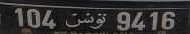



test_detected_license_plates\1009_cropped.jpg


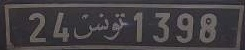



test_detected_license_plates\1010_cropped.jpg


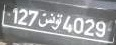



test_detected_license_plates\1011_cropped.jpg




test_detected_license_plates\1012_cropped.jpg


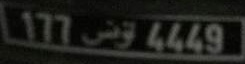



test_detected_license_plates\1013_cropped.jpg




test_detected_license_plates\1014_cropped.jpg


In [6]:
image_list = glob.glob('test_detected_license_plates/*.jpg')  # assuming JPG
for imageName in image_list[:15]:  # display only the first 10 images
    print(imageName)
    display(Image(filename=imageName))
    print("\n")